In [75]:
# Libraries for modular and efficient AI workflows
!pip install langgraph   # Graph-based workflows and task chaining
!pip install langchain   # Framework for building LLM-powered applications
!pip install langchain_community  # Extensions for document loaders and vector stores
!pip install langchainhub  # Prebuilt LangChain components (prompts, chains, tools)
!pip install langchain_groq  # Optimized LangChain for Groq hardware


Indtalling nessasry libar

In [4]:
!pip install requests


In [76]:
import requests
import json


Adding the API key from GROq


In [77]:
api_key = "gsk_xxxxxxxxxxxxxxxxxxxxxxxxxxx"


In [7]:
from google.colab import userdata
userdata.get('a456789')

'gsk_Snxxxxxxxxxxxxxxxxxxxxxxxxx'

In [8]:
from langgraph.graph import Graph

below is my class for the

In [29]:
import os
from langchain_groq import ChatGroq

# Option 1: Setting the API key directly
# Replace "YOUR_GROQ_API_KEY" with your actual API key
llm = ChatGroq(model="llama3-70b-8192", api_key="gsk_Sn**********")

In [30]:
llm.invoke("hi hows temparature?")

AIMessage(content='Hi! As a digital AI assistant, I don\'t have real-time access to current temperature readings. However, I can suggest some ways for you to find out the current temperature:\n\n1. Check online weather websites or apps: You can check websites like AccuWeather, Weather.com, or apps like Dark Sky (iOS, Android) or Weather Underground (iOS, Android) to get the current temperature in your location.\n2. Use a smart speaker or virtual assistant: If you have a smart speaker like Alexa or Google Assistant, you can ask them "What\'s the current temperature?" or "What\'s the weather like today?"\n3. Check your phone\'s weather app: Most smartphones come with a built-in weather app that can provide you with current temperature and weather conditions.\n\nPlease let me know if there\'s anything else I can help you with!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 171, 'prompt_tokens': 17, 'total_tokens': 188, 'completion_time': 0.505529175, 'prom

In [11]:
llm.invoke("hi how temperature ?").content

"Hi! Unfortunately, I'm a large language model, I don't have real-time access to current temperature information. However, I can suggest some ways for you to find out the current temperature:\n\n1. Check online weather websites or apps: Websites like AccuWeather, Weather.com, or apps like Dark Sky (iOS, Android) can provide you with current temperature information for your location.\n2. Use a virtual assistant: Virtual assistants like Google Assistant, Siri, or Alexa can also provide you with current temperature information.\n3. Check your device's weather app: Most smartphones come with a built-in weather app that can provide you with current temperature information.\n\nIf you'd like to know the temperature for a specific location, feel free to let me know the city or zip code, and I can try to provide you with the current temperature information!"

In [31]:
def function1(input):
  # Pass the api_key when initializing ChatGroq
  llm = ChatGroq(model="llama3-70b-8192", api_key="Add your API KEY")
  response = llm.invoke("Help me with lammaindex").content
  return response

In [32]:
function1("hey lamma")

"Lamman index! It's a measure of the diversity of a community, specifically used in ecology and biology. The Lamman index is a way to quantify the evenness of species distribution in a community.\n\nThe formula to calculate the Lamman index is:\n\nL = (S - 1) / (log(N) - 1)\n\nWhere:\n\n* L = Lamman index\n* S = number of species\n* N = total number of individuals in the community\n* log = natural logarithm\n\nThe Lamman index ranges from 0 to 1, where:\n\n* 0 indicates that one species dominates the community (low evenness)\n* 1 indicates that all species are equally abundant (high evenness)\n\nHere's an example to illustrate how to calculate the Lamman index:\n\nLet's say you have a community with 5 species and a total of 100 individuals. The abundance of each species is:\n\n Species A: 30 individuals\n Species B: 20 individuals\n Species C: 15 individuals\n Species D: 20 individuals\n Species E: 15 individuals\n\nFirst, calculate the total number of species (S) and the total number 

In [33]:
def function2(input):
  upper_string=input.upper()
  return upper_string

taking class name and creating a Object of it

In [34]:
from langgraph.graph import Graph # This imports the Graph class

workflow = Graph()

# Existing nodes and edges
workflow.add_node("function1", function1)
workflow.add_node("function2", function2)
workflow.add_edge("function1", "function2")

# Set the entry point of the workflow
workflow.set_entry_point("function1")  # This line sets 'function1' as the starting node

app = workflow.compile()

In [17]:
# Set the entry point of the workflow
workflow.set_finish_point("function2")

In [18]:
app = workflow.compile()

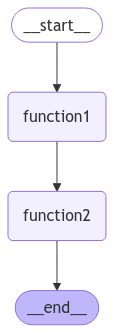

In [19]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)


In [72]:
# Create a workflow graph
workflow = Graph() # Create a new Graph instance

# Define the prepare_function
def prepare_function(input=None):
  """Placeholder function for the 'prepare' node."""
  # Add your desired logic here
  print("Preparing data...")  # Example: Print a message
  return input  # Return the input (or modify it as needed)

# Add nodes to the graph
workflow.add_node("prepare", prepare_function)
workflow.add_node("llm", function1)      # LLM node
workflow.add_node("upper_string", function2)  # Uppercase string node

# Add edges to define the flow
workflow.add_edge("prepare", "llm")           # Flow from start to llm
workflow.add_edge("llm", "upper_string")    # Flow from llm to upper_string

# Set the entry point of the workflow
workflow.set_entry_point("prepare")  # Start the workflow at the "start" node

# Compile the workflow into an application
app = workflow.compile()

In [73]:
# Set the finish point of the workflow (instead of set_end_point)
workflow.set_finish_point("upper_string")

Or we try to reroute the function


In [20]:
function1("llm")

"Lamman index! That's a fascinating topic.\n\nThe Lamman index is a statistical measure used in ecology and biology to quantify the degree of similarity or dissimilarity between two communities or species assemblages. It's often used to compare the composition of species in different habitats, environments, or time periods.\n\nThe Lamman index (also known as the Sørensen–Dice coefficient or Czekanowski index) is calculated using the following formula:\n\nLamman index (L) = 2 \\* (number of shared species) / (total number of species in community 1 + total number of species in community 2)\n\nThe index ranges from 0 (completely dissimilar communities) to 1 (identical communities).\n\nHere's an example to illustrate how it works:\n\nLet's say you have two communities:\n\nCommunity 1: A, B, C, D, E (5 species)\nCommunity 2: A, B, C, F, G (5 species)\n\nThe shared species between the two communities are A, B, and C. To calculate the Lamman index:\n\nL = 2 \\* (3 shared species) / (5 species

In [21]:
def function2(input):
  upper_string=input.upper()
  return upper_string

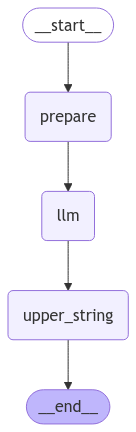

In [74]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [83]:
from langgraph.graph import Graph  # Import the Graph class

# Create a workflow graph
workflow = Graph()


# Add nodes to the graph
workflow.add_node("sense", sense_function)  # Sense node
workflow.add_node("think", think_function)  # Think node
workflow.add_node("act", act_function)      # Act node

# Add edges to define the flow
workflow.add_edge("sense", "think")  # Flow from sense to think
workflow.add_edge("think", "act")    # Flow from think to act

# Set the entry point of the workflow
workflow.set_entry_point("sense")  # Start the workflow at the "sense" node

# Compile the workflow into an application
app = workflow.compile()


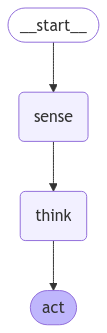

In [84]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

Here are simplified workflows for creating AI agents using basic agent patterns:

Sense → Think → Act:

The agent senses the environment (input), thinks by processing data or making decisions, and acts to affect the environment.
Example: A chatbot senses user input, decides on a response, and outputs it.


"Above are the AI patterns I have developed to optimize workflows and create intelligent agents using advanced machine learning techniques, LangChain, GROCQ, and API integrations.

similarly we can create a complex Agentic pattern, simple aggentic pattern, multi agentic pattern

 Primarily, I have built an agentic AI with LangGraph, which provides a robust framework for constructing complex, simple, and multi-agentic patterns.

  These patterns are instrumental in designing efficient workflows, enabling dynamic task coordination, adaptive decision-making, and seamless multi-agent collaboration for solving intricate problems.